In [91]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
# from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pathlib import Path

In [2]:
input_folder = ''
input_file = 'crypto_data_with_indicators.parquet'
input_path = Path(input_folder) / input_file
input_path

WindowsPath('crypto_data_with_indicators.parquet')

In [92]:
# Importando a base
dados = pd.read_parquet(input_path)
dados.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Date,ema_12,ema_26,ema_50,ema_100,ema_200,ema_12_above_ema_26,ema_12_above_ema_50,ema_12_above_ema_100,ema_12_above_ema_200,min_50,percent_risk,vl_adx,vl_dmp,vl_dmn,nm_adx_trend,rsi,vl_macd,vl_macd_signal,vl_macd_delta,qt_days_macd_delta_positive,percent_loss_profit_7_days,percent_loss_profit_14_days
0,0.007470,0.007741,0.004447,0.004909,17877772,0.0,0.0,1CAT-USD,2023-12-20 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,0,NaN,NaN
1,0.004910,0.007222,0.004046,0.005551,14832067,0.0,0.0,1CAT-USD,2023-12-21 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,0,NaN,NaN
2,0.005538,0.006355,0.005210,0.006131,6806635,0.0,0.0,1CAT-USD,2023-12-22 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,0,NaN,NaN


In [94]:
# dados.unique().count_values()
dados['Symbol'].value_counts()

Symbol
ZRX-USD      2376
LSK-USD      2376
GLM-USD      2376
ICX-USD      2376
KCS-USD      2376
             ... 
LISTA-USD      14
ZKX-USD        14
CTA-USD        11
OORT-USD       10
FT-USD          9
Name: count, Length: 780, dtype: int64

In [99]:
dados = dados[dados['Symbol'] ==  'GLM-USD']

dados['Symbol'].value_counts()

Symbol
GLM-USD    2376
Name: count, dtype: int64

In [100]:
# estatísticas da base
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2376 entries, 317396 to 319771
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype                            
---  ------                       --------------  -----                            
 0   Open                         2376 non-null   float64                          
 1   High                         2376 non-null   float64                          
 2   Low                          2376 non-null   float64                          
 3   Close                        2376 non-null   float64                          
 4   Volume                       2376 non-null   int64                            
 5   Dividends                    2376 non-null   float64                          
 6   Stock Splits                 2376 non-null   float64                          
 7   Symbol                       2376 non-null   object                           
 8   Date                         2376 non-null   d

In [5]:
## criando coluna de targets
dados['target_10_7d'] = 0
dados['target_15_7d'] = 0
dados['target_20_7d'] = 0
dados['target_25_7d'] = 0 #acima de 25

dados['target_10_15d'] = 0
dados['target_15_15d'] = 0
dados['target_20_15d'] = 0
dados['target_25_15d'] = 0 #acima de 25

dados['target_10_30d'] = 0
dados['target_15_30d'] = 0
dados['target_20_30d'] = 0
dados['target_25_30d'] = 0 #acima de 25

## criando coluna de maximos
# dados['target_max_7d'] = 0
# dados['target_min_7d'] = 0

# dados['target_max_15d'] = 0
# dados['target_min_15d'] = 0

# dados['target_max_30d'] = 0
# dados['target_min_30d'] = 0

# mente_aberta = dados['Caracteristica do Gestor'] == '"Cabeça aberta"'
# dados.loc[mente_aberta, 'target_gestor'] = 1

# dados['target_suporte'] = 0
# baixo_suporte = (dados['Frequencia Suporte'] == 'Menos de uma vez por semana') | (dados['Frequencia Suporte'] == 'Raramente')
# #baixo_suporte = dados['Frequencia Suporte'] == 'Raramente'
# dados.loc[baixo_suporte, 'target_suporte'] = 1

dados.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Date,ema_12,...,target_20_7d,target_25_7d,target_10_15d,target_15_15d,target_20_15d,target_25_15d,target_10_30d,target_15_30d,target_20_30d,target_25_30d
0,0.007470,0.007741,0.004447,0.004909,17877772,0.0,0.0,1CAT-USD,2023-12-20 21:00:00-03:00,NaN,...,0,0,0,0,0,0,0,0,0,0
1,0.004910,0.007222,0.004046,0.005551,14832067,0.0,0.0,1CAT-USD,2023-12-21 21:00:00-03:00,NaN,...,0,0,0,0,0,0,0,0,0,0
2,0.005538,0.006355,0.005210,0.006131,6806635,0.0,0.0,1CAT-USD,2023-12-22 21:00:00-03:00,NaN,...,0,0,0,0,0,0,0,0,0,0


In [41]:
##Removendo NA
dados = dados.dropna()

In [42]:
cols_target = ['target_10_7d','target_15_7d','target_20_7d','target_25_7d',
                'target_10_15d','target_15_15d','target_20_15d','target_25_15d', 
                'target_10_30d','target_15_30d','target_20_30d','target_25_30d']

cols_target.insert(0,'Symbol')
cols_target.insert(0,'Date')

# Definindo o target, fazer uma iteração aqui
dados_y = dados['target_10_7d']
# Retirando todos os target da base para evitar data leakage
dados_x = dados.drop(dados[cols_target], axis=1)

print(dados_x)
print(dados_y)
print(cols_target)

None
            Open      High       Low     Close     Volume  Dividends  \
395     2.518235  2.587015  2.376835  2.425992  222145233        0.0   
396     2.422219  2.454345  2.287377  2.319626  210255307        0.0   
397     2.320493  2.360377  2.178263  2.295866  213989919        0.0   
398     2.296512  2.348247  2.127000  2.143274  202690477        0.0   
399     2.146183  2.205100  1.956874  1.968316  208690875        0.0   
...          ...       ...       ...       ...        ...        ...   
888990  0.530510  0.537353  0.509683  0.515026   22920533        0.0   
888991  0.515026  0.529941  0.506859  0.519982   22996184        0.0   
888992  0.519982  0.525311  0.514813  0.520001   11388321        0.0   
888993  0.520002  0.525010  0.503009  0.508583   13395964        0.0   
888994  0.508583  0.520904  0.502687  0.503241   15736066        0.0   

        Stock Splits    ema_12    ema_26    ema_50  ...     vl_dmp     vl_dmn  \
395              0.0  2.547924  2.689505  3.04101

In [43]:
len(dados_x.columns.unique())
dados_x.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'ema_12', 'ema_26', 'ema_50', 'ema_100', 'ema_200',
       'ema_12_above_ema_26', 'ema_12_above_ema_50', 'ema_12_above_ema_100',
       'ema_12_above_ema_200', 'min_50', 'percent_risk', 'vl_adx', 'vl_dmp',
       'vl_dmn', 'nm_adx_trend', 'rsi', 'vl_macd', 'vl_macd_signal',
       'vl_macd_delta', 'qt_days_macd_delta_positive',
       'percent_loss_profit_7_days', 'percent_loss_profit_14_days'],
      dtype='object')

In [44]:
# Convertendo valores de string para valores númericos para conseguirmos usar no modelo de Regressão.
dummies = pd.get_dummies(dados_x)

print(dummies.columns)
print(len(dummies.columns))
display(dummies)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'ema_12', 'ema_26', 'ema_50', 'ema_100', 'ema_200',
       'ema_12_above_ema_26', 'ema_12_above_ema_50', 'ema_12_above_ema_100',
       'ema_12_above_ema_200', 'min_50', 'percent_risk', 'vl_adx', 'vl_dmp',
       'vl_dmn', 'rsi', 'vl_macd', 'vl_macd_signal', 'vl_macd_delta',
       'qt_days_macd_delta_positive', 'percent_loss_profit_7_days',
       'percent_loss_profit_14_days', 'nm_adx_trend_1. Absent or Weak Trend',
       'nm_adx_trend_2. Strong Trend', 'nm_adx_trend_3. Very Strong Trend',
       'nm_adx_trend_4. Extremely Strong Trend'],
      dtype='object')
32


,Open,High,Low,Close,Volume,Dividends,Stock Splits,ema_12,ema_26,ema_50,...,vl_macd,vl_macd_signal,vl_macd_delta,qt_days_macd_delta_positive,percent_loss_profit_7_days,percent_loss_profit_14_days,nm_adx_trend_1. Absent or Weak Trend,nm_adx_trend_2. Strong Trend,nm_adx_trend_3. Very Strong Trend,nm_adx_trend_4. Extremely Strong Trend
395,2.518235,2.587015,2.376835,2.425992,222145233,0.0,0.0,2.547924,2.689505,3.041013,...,-0.141581,-0.172542,0.030961,10,-0.023782,-0.017048,True,False,False,False
396,2.422219,2.454345,2.287377,2.319626,210255307,0.0,0.0,2.512801,2.662106,3.012723,...,-0.149305,-0.167894,0.018590,11,-0.182770,-0.083334,True,False,False,False
397,2.320493,2.360377,2.178263,2.295866,213989919,0.0,0.0,2.479427,2.634977,2.984611,...,-0.155551,-0.165426,0.009875,12,-0.168536,-0.094626,True,False,False,False
398,2.296512,2.348247,2.127000,2.143274,202690477,0.0,0.0,2.427711,2.598555,2.951618,...,-0.170844,-0.166509,-0.004335,0,-0.146590,-0.099205,True,False,False,False
399,2.146183,2.205100,1.956874,1.968316,208690875,0.0,0.0,2.357035,2.551870,2.913057,...,-0.194836,-0.172175,-0.022661,0,-0.236536,-0.178380,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888990,0.530510,0.537353,0.509683,0.515026,22920533,0.0,0.0,0.541361,0.536017,0.550407,...,0.005344,0.006473,-0.001128,0,-0.097169,0.034856,False,True,False,False
888991,0.515026,0.529941,0.506859,0.519982,22996184,0.0,0.0,0.538072,0.534829,0.549214,...,0.003243,0.005827,-0.002584,0,-0.072845,-0.101472,False,True,False,False
888992,0.519982,0.525311,0.514813,0.520001,11388321,0.0,0.0,0.535292,0.533731,0.548069,...,0.001561,0.004974,-0.003412,0,-0.085515,-0.114973,False,True,False,False
888993,0.520002,0.525010,0.503009,0.508583,13395964,0.0,0.0,0.531183,0.531868,0.546520,...,-0.000685,0.003842,-0.004527,0,-0.074043,-0.081533,False,True,False,False


In [45]:
# Convertendo valores de string para valores númericos para conseguirmos usar no modelo de Regressão.
dummies = pd.get_dummies(dados_x)

# Carregando os dados em um array numpy
X = np.array(dummies.values)
y = np.array(dados_y.values)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

print(X)
print(X.shape)
print(y)
print(y.shape)

[[2.518234968185425 2.58701491355896 2.3768351078033447 ... False False
  False]
 [2.4222190380096436 2.4543449878692627 2.287377119064331 ... False False
  False]
 [2.32049298286438 2.360377073287964 2.178262948989868 ... False False
  False]
 ...
 [0.5199819803237915 0.5253109931945801 0.5148130059242249 ... True False
  False]
 [0.520002007484436 0.5250099897384644 0.503009021282196 ... True False
  False]
 [0.5085830092430115 0.520904004573822 0.5026869773864746 ... True False
  False]]
(723832, 32)
[0 0 0 ... 0 0 0]
(723832,)


In [82]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)


In [71]:
X_train

array([[3.6064860820770264, 3.671574115753174, 3.569488048553467, ...,
        True, False, False],
       [0.21143899857997894, 0.21860599517822266, 0.1957560032606125,
        ..., False, False, False],
       [9.9920015335083, 14.8975248336792, 9.475076675415039, ..., True,
        False, False],
       ...,
       [1.0260859727859497, 1.032520055770874, 1.0222059488296509, ...,
        False, False, False],
       [22.924657821655273, 23.77416229248047, 22.38041877746582, ...,
        False, False, False],
       [0.2796579897403717, 0.34899500012397766, 0.2721570134162903, ...,
        False, False, False]], dtype=object)

In [51]:
# # Check data types
# print(X_train.dtype)

# # If the dtype is object, it might contain non-numeric data
# if X_train.dtype == 'object':
#     # Attempt to convert to float
#     try:
#         X_train = X_train.astype(np.float64)
#     except ValueError:
#         print("X_train contains non-numeric data")


object


In [83]:
import numpy as np

# Ensure X_train is a NumPy array
X_train = np.array(X_train, dtype=np.float64)

# Check for infinity values
if np.isinf(X_train).any():
    print(X_train.shape)

    print("X_train contains infinity values")
    # Replace infinity values with a large finite number
    # X_train = np.where(np.isinf(X_train), np.finfo(np.float64).max, X_train)

    X_train = X_train[~np.isinf(X_train).any(axis=1)]
    print(X_train.shape)

# Check for NaN values
if np.isnan(X_train).any():
    print("X_train contains NaN values")
    print(X_train.shape)
    # Optionally, replace NaN values with the mean of the column
    # col_means = np.nanmean(X_train, axis=0)
    # X_train = np.where(np.isnan(X_train), col_means, X_train)
    X_train = X_train[~np.isnan(X_train).any(axis=1)]
    print(X_train.shape)


(506682, 32)
X_train contains infinity values
(506423, 32)


In [88]:
import numpy as np

# Ensure y_train is a NumPy array
y_train = np.array(y_train, dtype=np.float64)

# Check for infinity values
if np.isinf(y_train).any():
    print(y_train.shape)

    print("y_train contains infinity values")
    # Replace infinity values with a large finite number
    # y_train = np.where(np.isinf(y_train), np.finfo(np.float64).max, y_train)

    y_train = y_train[~np.isinf(y_train).any(axis=1)]
    print(y_train.shape)

# Check for NaN values
if np.isnan(y_train).any():
    print("y_train contains NaN values")
    print(y_train.shape)
    # Optionally, replace NaN values with the mean of the column
    # col_means = np.nanmean(y_train, axis=0)
    # y_train = np.where(np.isnan(y_train), col_means, y_train)
    y_train = y_train[~np.isnan(y_train).any(axis=1)]
    print(y_train.shape)


In [84]:
# Para as variáveis de treino

# normalizando e padronizando os dados
# MinMaxScaler é usado para normalizar as variáveis, e StandardScaler é usado para padronizar
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# dados x (features) normalizados
# X = np.array(X)

# normalizando
scaler = MinMaxScaler()
scaler.fit(X_train)
normalized_data = scaler.transform(X_train)
print(normalized_data)

# Padronizando
scaler = StandardScaler()
scaler.fit(X_train)
standardized_data = scaler.transform(X_train)
print(standardized_data)

print(standardized_data.shape)

X_train = standardized_data


[[4.93502590e-05 1.41848221e-06 5.00390187e-05 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.89327869e-06 8.44562500e-08 2.74421378e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.36728065e-04 5.75553636e-06 1.32826762e-04 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.40407054e-05 3.98905283e-07 1.43298372e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.13695319e-04 9.18495256e-06 3.13740844e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.82677041e-06 1.34830975e-07 3.81524456e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[-0.07611484 -0.04658757 -0.07590741 ...  1.09605286 -0.29976243
  -0.11298221]
 [-0.07740771 -0.04734918 -0.07722938 ... -0.91236476 -0.29976243
  -0.11298221]
 [-0.07368318 -0.04411151 -0.07359334 ...  1.09605286 -0.29976243
  -0.11298221]
 ...
 [-0.07709749 -0.04716966 -0.07690554 ... -0.91236476 -0.29976243
  -0.11298221]
 [-0.06875829 -0.04215362 -0.06853647 ... -0.91236476 -0.29976243
  -0.

In [85]:
import numpy as np

# Ensure X_test is a NumPy array
X_test = np.array(X_test, dtype=np.float64)

# Check for infinity values
if np.isinf(X_test).any():
    print("X_test contains infinity values")
    # Replace infinity values with a large finite number
    X_test = np.where(np.isinf(X_test), np.finfo(np.float64).max, X_test)

# Check for NaN values
if np.isnan(X_test).any():
    print("X_test contains NaN values")
    # Optionally, replace NaN values with the mean of the column
    col_means = np.nanmean(X_test, axis=0)
    X_test = np.where(np.isnan(X_test), col_means, X_test)

X_test contains infinity values


In [86]:
# Para as variáveis de teste

# normalizando e padronizando os dados
# MinMaxScaler é usado para normalizar as variáveis, e StandardScaler é usado para padronizar
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# dados x (features) normalizados
# X = np.array(X)

# normalizando
scaler = MinMaxScaler()
scaler.fit(X_test)
normalized_data = scaler.transform(X_test)
print(normalized_data)

# Padronizando
scaler = StandardScaler()
scaler.fit(X_test)
standardized_data = scaler.transform(X_test)
print(standardized_data)

print(standardized_data.shape)

X_test = standardized_data

[[3.32125807e-06 1.60302928e-08 3.97491696e-06 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.73302986e-08 2.89512760e-10 5.83637396e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.34155377e-04 6.80100991e-07 1.56653265e-04 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [4.45041994e-06 2.39602864e-08 5.63784983e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.33184266e-07 1.35603153e-09 7.92145916e-07 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.70617891e-07 2.29576814e-09 1.05594114e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[-0.07659036 -0.00773644 -0.07651667 ...  1.09436275 -0.29919849
  -0.11408544]
 [-0.07669408 -0.00774376 -0.07660995 ... -0.9137738  -0.29919849
  -0.11408544]
 [-0.07243275 -0.00742782 -0.07231705 ...  1.09436275 -0.29919849
  -0.11408544]
 ...
 [-0.07655448 -0.00773276 -0.07647093 ... -0.9137738  -0.29919849
  -0.11408544]
 [-0.07668849 -0.00774326 -0.07660422 ...  1.09436275 -0.29919849
  -0.

c:\Users\mathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\mathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count


In [87]:
# Criando o modelo
model = LogisticRegression(random_state=0,max_iter=1000)

# Treinando o modelo
model.fit(X_train, y_train)

clf2 = LogisticRegression(random_state=45,max_iter=1000).fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [506423, 506682]

In [356]:
# Fazendo a previsão das classes
y_pred2 = clf2.predict(X_test)

In [357]:
# Avaliando o erro

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred2)

array([[7, 3],
       [5, 8]], dtype=int64)

In [358]:
# Avaliando o modelo 
# score = model.score(X_test, y_test)

from sklearn import metrics

score = metrics.accuracy_score(y_test, y_pred2)

print('Acurácia:', score)

# Percentagem de acerto

Acurácia: 0.6521739130434783


In [359]:
# Usando o modelo para previsão
predictions = model.predict(X_test)
print(predictions)

[0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0]


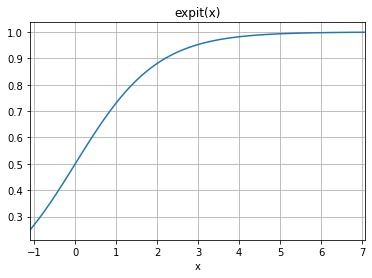

In [360]:
# Visualizando o gráfico

import matplotlib.pyplot as plt
from scipy.special import expit

x = np.linspace(X_train.min(), X_train.max(), 100)
y = expit(x)
plt.plot(x, y)
plt.grid()
plt.xlim(X_train.min(), X_train.max())
plt.xlabel('x')
plt.title('expit(x)')
plt.show()

In [361]:
# Comparando a previsão com o valor real
print('O valor de y teste é:')
print(y_test)

print('O valor do y_pred é:')
print(predictions)

O valor de y teste é:
[0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0]
O valor do y_pred é:
[0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0]


In [362]:
# Fazendo a previsão das probabilidades
proba = clf2.predict_proba(X_test)
print(proba)

# Probabilidade de acionar o suporte até 1vez na semana é de:
probabilidade_baixo_suporte = proba[:,1]

list(probabilidade_baixo_suporte)

[[0.59223035 0.40776965]
 [0.2301582  0.7698418 ]
 [0.07629264 0.92370736]
 [0.51103819 0.48896181]
 [0.76251408 0.23748592]
 [0.97398708 0.02601292]
 [0.02097275 0.97902725]
 [0.51103819 0.48896181]
 [0.361592   0.638408  ]
 [0.87151527 0.12848473]
 [0.01553828 0.98446172]
 [0.91894554 0.08105446]
 [0.07629264 0.92370736]
 [0.07629264 0.92370736]
 [0.0842806  0.9157194 ]
 [0.07629264 0.92370736]
 [0.07629264 0.92370736]
 [0.5664636  0.4335364 ]
 [0.99706477 0.00293523]
 [0.98352846 0.01647154]
 [0.07629264 0.92370736]
 [0.97843284 0.02156716]
 [0.51103819 0.48896181]]


[0.4077696524503161,
 0.7698418012274668,
 0.9237073602477,
 0.4889618100248178,
 0.23748591965772278,
 0.026012921636521382,
 0.9790272474459333,
 0.4889618100248178,
 0.6384080045585301,
 0.12848473413568975,
 0.9844617153706811,
 0.08105446368691667,
 0.9237073602477,
 0.9237073602477,
 0.9157193964453859,
 0.9237073602477,
 0.9237073602477,
 0.43353639659208865,
 0.002935234833902952,
 0.016471541753645718,
 0.9237073602477,
 0.02156716236748745,
 0.4889618100248179]

### Prevendo novos valores

In [386]:
dados_x_input = dados.drop(dados[['Frequencia Suporte', 'Tipo de Suporte','Categoria Suporte','target_gestor','target_suporte']], axis=1)
dados_x_input['Input'] = 0

dados_y = dados['target_suporte']

dados_x_input

,Atividade,Ramo de atuação,Colaboradores,Faixa etária gestor,Caracteristica do Gestor,Faturamento estimado,Input
0,SERVIÇO,AUTOMÓVEIS,De 5 a 10,De 30 a 40 anos,"""Cabeça aberta""",De R$ 100 a R$ 400 mil,0
1,COMÉRCIO,INSTRUMENTOS MUSICAIS,De 10 a 20,De 30 a 40 anos,"""Cabeça aberta""",Acima de R$ 400 mil,0
2,INDÚSTRIA,MOVELEIRO,De 10 a 20,De 30 a 40 anos,"""Cabeça aberta""",De R$ 100 a R$ 400 mil,0
3,SERVIÇO,ELÉTRICA,De 5 a 10,De 40 a 50 anos,"""Cabeça aberta""",De R$ 50 a R$ 100 mil,0
4,INDÚSTRIA,CONSTRUÇÃO,De 20 a 30,De 40 a 50 anos,Pensamento rígido,De R$ 100 a R$ 400 mil,0
...,...,...,...,...,...,...,...
69,COMÉRCIO,VESTUÁRIO,Até 5,De 30 a 40 anos,Desatualizado,Até R$ 50 mil,0
70,INDÚSTRIA,CALÇADOS,De 10 a 20,De 30 a 40 anos,Pensamento rígido,De R$ 50 a R$ 100 mil,0
71,INDÚSTRIA,CALÇADOS,De 10 a 20,De 30 a 40 anos,Pensamento rígido,De R$ 50 a R$ 100 mil,0
72,COMÉRCIO,ALIMENTAÇÃO,Até 5,De 30 a 40 anos,Desatualizado,Até R$ 50 mil,0


In [455]:
data = {}


for item in dados_x_input.columns[:-1]:
    
    print(f'Para a coluna de {item}')

    options = set(dados_x_input[item])

    lista_len = len(options)

    c = 1
    opt = []


    for op in options:
        list_add_opt = []
        list_add_opt = [[c], [op]]
        opt.append(list_add_opt)
        c += 1

    data[item] = opt

print(data)


Para a coluna de Atividade
Para a coluna de Ramo de atuação
Para a coluna de Colaboradores
Para a coluna de Faixa etária gestor
Para a coluna de Caracteristica do Gestor
Para a coluna de Faturamento estimado
{'Atividade': [[[1], ['SERVIÇO']], [[2], ['COMÉRCIO']], [[3], ['INDÚSTRIA']]], 'Ramo de atuação': [[[1], ['CONTABILIDADE']], [[2], ['METAL MECÂNICA']], [[3], ['MADEREIRA']], [[4], ['CALÇADOS']], [[5], ['RETÍFICA DE MOTORES']], [[6], ['DISTRIBUIDORA DE GÁS']], [[7], ['ELÉTRICA']], [[8], ['PRODUTOS DE LIMPEZA']], [[9], ['PEÇAS']], [[10], ['PANIFICAÇÃO']], [[11], ['ALIMENTAÇÃO']], [[12], ['DEDETIZAÇÃO']], [[13], ['AUTOMÓVEIS']], [[14], ['CONSTRUÇÃO']], [[15], ['AGROPECUÁRIA']], [[16], ['JOALHEIRIA']], [[17], ['MONITORAMENTO']], [[18], ['MOVELEIRO']], [[19], ['LAZER E PISCINAS']], [[20], ['VESTUÁRIO']], [[21], ['MÁQUINAS DE COSTURA']], [[22], ['AGROINDÚSTRIA']], [[23], ['AUTOPEÇAS']], [[24], ['INSTRUMENTOS MUSICAIS']]], 'Colaboradores': [[[1], ['De 20 a 30']], [[2], ['De 10 a 20']], [[

In [473]:
data_input = {}

for k,v in data.items():
   # for i in k:
    print(f'Escolha o número da opção de {k}')

    opt_list = len(v)
    for i in range(0, opt_list):
        print(f'{v[i][0]} - {v[i][1]}')
        
    number = 0
    while number not in range(1, opt_list + 1):
        number = int(input(f'Digite o número da opção. Escolha valores entre {range(1, opt_list+1)}'))
    print(f'Você escolheu a opção {v[number][1]}')
    
    data_input[k] = v[number][1]

data_input['Input'] = [1]

print(data_input)

Escolha o número da opção de Atividade
[1] - ['SERVIÇO']
[2] - ['COMÉRCIO']
[3] - ['INDÚSTRIA']


Você escolheu a opção ['COMÉRCIO']
Escolha o número da opção de Ramo de atuação
[1] - ['CONTABILIDADE']
[2] - ['METAL MECÂNICA']
[3] - ['MADEREIRA']
[4] - ['CALÇADOS']
[5] - ['RETÍFICA DE MOTORES']
[6] - ['DISTRIBUIDORA DE GÁS']
[7] - ['ELÉTRICA']
[8] - ['PRODUTOS DE LIMPEZA']
[9] - ['PEÇAS']
[10] - ['PANIFICAÇÃO']
[11] - ['ALIMENTAÇÃO']
[12] - ['DEDETIZAÇÃO']
[13] - ['AUTOMÓVEIS']
[14] - ['CONSTRUÇÃO']
[15] - ['AGROPECUÁRIA']
[16] - ['JOALHEIRIA']
[17] - ['MONITORAMENTO']
[18] - ['MOVELEIRO']
[19] - ['LAZER E PISCINAS']
[20] - ['VESTUÁRIO']
[21] - ['MÁQUINAS DE COSTURA']
[22] - ['AGROINDÚSTRIA']
[23] - ['AUTOPEÇAS']
[24] - ['INSTRUMENTOS MUSICAIS']
Você escolheu a opção ['METAL MECÂNICA']
Escolha o número da opção de Colaboradores
[1] - ['De 20 a 30']
[2] - ['De 10 a 20']
[3] - ['Até 5']
[4] - ['De 30 a 50']
[5] - ['De 5 a 10']
Você escolheu a opção ['De 10 a 20']
Escolha o número da opção de Faixa etária gestor
[1] - ['50+']
[2] - ['De 30 a 40 anos']
[3] - ['De 40 a 50 anos']
[4] - [

In [475]:
dados_input = pd.DataFrame(data_input)

dados_input = pd.concat([dados_x_input, dados_input])

dados_input.tail(3)

,Atividade,Ramo de atuação,Colaboradores,Faixa etária gestor,Caracteristica do Gestor,Faturamento estimado,Input
72,COMÉRCIO,ALIMENTAÇÃO,Até 5,De 30 a 40 anos,Desatualizado,Até R$ 50 mil,0
73,COMÉRCIO,CONSTRUÇÃO,Até 5,50+,Pensamento rígido,Até R$ 50 mil,0
0,COMÉRCIO,METAL MECÂNICA,De 10 a 20,De 30 a 40 anos,Totalmente Antiquado,De R$ 100 a R$ 400 mil,1


In [412]:
## Realizando a previsão:
## Adição manual

# data = {
#     'Atividade': ['COMÉRCIO'],
#     'Ramo de atuação': ['PANIFICAÇÃO'],
#     'Colaboradores': ['De 10 a 20'],
#     'Faixa etária gestor': ['50+'],
#     'Caracteristica do Gestor': ['"Cabeça aberta"'],
#     'Faturamento estimado': ['Até R$ 50 mil'],
#     'Input': [1]
# }

# dados_input = pd.DataFrame(data)

# dados_input = pd.concat([dados_x_input, dados_input])

# dados_input.tail(3)


,Atividade,Ramo de atuação,Colaboradores,Faixa etária gestor,Caracteristica do Gestor,Faturamento estimado,Input
72,COMÉRCIO,ALIMENTAÇÃO,Até 5,De 30 a 40 anos,Desatualizado,Até R$ 50 mil,0
73,COMÉRCIO,CONSTRUÇÃO,Até 5,50+,Pensamento rígido,Até R$ 50 mil,0
0,COMÉRCIO,PANIFICAÇÃO,De 10 a 20,50+,"""Cabeça aberta""",Até R$ 50 mil,1


In [413]:
# Convertendo valores de string para valores númericos para conseguirmos usar no modelo de Regressão.
dummies = pd.get_dummies(dados_input)

#print(dummies.columns)

#print(dummies)


In [414]:
dummies_input = dummies[dummies['Input'] == 1]
dummies_input = dummies_input.drop(dummies_input[['Input']], axis=1)
dummies_input


,Atividade_COMÉRCIO,Atividade_INDÚSTRIA,Atividade_SERVIÇO,Ramo de atuação_AGROINDÚSTRIA,Ramo de atuação_AGROPECUÁRIA,Ramo de atuação_ALIMENTAÇÃO,Ramo de atuação_AUTOMÓVEIS,Ramo de atuação_AUTOPEÇAS,Ramo de atuação_CALÇADOS,Ramo de atuação_CONSTRUÇÃO,...,Faixa etária gestor_De 40 a 50 anos,"Caracteristica do Gestor_""Cabeça aberta""",Caracteristica do Gestor_Desatualizado,Caracteristica do Gestor_Pensamento Rígido,Caracteristica do Gestor_Pensamento rígido,Caracteristica do Gestor_Totalmente Antiquado,Faturamento estimado_Acima de R$ 400 mil,Faturamento estimado_Até R$ 50 mil,Faturamento estimado_De R$ 100 a R$ 400 mil,Faturamento estimado_De R$ 50 a R$ 100 mil
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [415]:
# Carregando os dados em um array numpy
X = np.array(dummies_input.values)

In [416]:
# Usando o modelo para previsão
print('Prevendo classificação para o dado de entrada... \n 0 - Frequência de suporte + 1 Vez por Semana \n 1 - Frequência de suporte menor do que 1 vez por semana')

print('')

# Fazendo a previsão das probabilidades
proba = clf2.predict_proba(X)


print(f'Classificação 0 --> {(proba[0][0] * 100):.2f}% de probabilidade')
print(f'Classificação 1 --> {(proba[0][1] * 100):.2f}% de probabilidade')

print()


predictions = model.predict(X)[-1]
print('A classificação predita foi', predictions)


# Performance do modelo:
print('\nAcurácia do modelo:', round((score * 100),2), '%')


# Probabilidade de acionar o suporte até 1 vez na semana é de:
#probabilidade_baixo_suporte = proba[:,1]

#list(probabilidade_baixo_suporte)

Prevendo classificação para o dado de entrada... 
 0 - Frequência de suporte + 1 Vez por Semana 
 1 - Frequência de suporte menor do que 1 vez por semana

Classificação 0 --> 72.50% de probabilidade
Classificação 1 --> 27.50% de probabilidade

A classificação predita foi 0

Acurácia do modelo: 65.22 %
